In [5]:
import numpy as np
import pandas as pd

from utils.timeutil import YearMonth

hst = pd.read_csv(".cache/historical_data.csv", dtype={"code": str})
hst["매수년월"] = hst["매수년월"].apply(lambda x: YearMonth.from_string(x))
hst["매도년월"] = hst["매도년월"].apply(lambda x: YearMonth.from_string(x))
hst = hst[hst["확정실적"].notna()]

In [6]:
# RECIPE ==========================================================

recipes = {
    "벨류": {
        "GP/P": 0.120550,
        "EQ/P": 0.105678,
    },
    "성장": {
        "O_QoQ": 0.027,
        "E_QoQ": 0.024,
        "EBT_QoQ": 0.017,
        "O/A_QoQ": 0.013,
        "E/EQ_QoQ": 0.011,
        "O/EQ_QoQ": 0.01,
        "E/A_QoQ": 0.009,
        "EBT/A_QoQ": 0.008,
        "EBT/EQ_QoQ": 0.006,
        "GP/EQ_QoQ": 0.004,
        "GP/A_QoQ": 0.004,
        "GP_QoQ": 0.003,
        "R_QoQ": 0.001,
        "R/EQ_QoQ": 0.001,
        "R/A_QoQ": 0.001,
    },
    "가격": {
        "P": -1
    },
    "전략": {
        "성장": 1,
        "벨류": 1,
        "가격": 1
    }
}
# for k1 in ["R", "GP", "O", "EBT", "E"]:
#     recipes[k1 + "성장"] = {
#         k1 + k2 + "_QoQ": 1 for k2 in ["", "/A", "/EQ"]
#     }
# 
# for k1 in ["_QoQ", "/A_QoQ", "/EQ_QoQ"]:
#     recipes[k1 + "성장"] = {
#         k2 + k1: 1 for k2 in ["R", "GP", "O", "EBT", "E"]
#     }
# 
# recipes["신성장"] = {
#     "_QoQ성장": 1,
#     "O성장": 1
# }

# =================================================================

pct_scale = 100
for title, recipe in recipes.items():
    # Calculate recipe
    hst[title] = hst.apply(lambda row: sum([row[f"{k}_pct"] * w for k, w in recipe.items()]), axis=1)

    # Calculate pct
    grouped_by_month = hst.groupby("매도년월")[title]
    rank = grouped_by_month.apply(lambda x: np.ceil(x.rank(pct=True) * pct_scale))
    hst[f"{title}_pct"] = rank.reset_index(level=0, drop=True)

hst

,code,매수년월,매도년월,종목명,매수일,매수가,P,vol,val,shares,...,E/EQ_pct,E/R_pct,벨류,벨류_pct,성장,성장_pct,가격,가격_pct,전략,전략_pct
0,000020,2014-04,2014-05,동화약품,2014-04-30,6000.0,1.675888e+11,1566607.0,9.163852e+09,27931470.0,...,30.0,32.0,18.308022,88.0,6.819,52.0,-66.0,35.0,175.0,68.0
1,000040,2014-04,2014-05,KR모터스,2014-04-30,1245.0,1.485800e+11,118231719.0,1.300651e+11,119341379.0,...,16.0,16.0,2.217664,5.0,10.297,76.0,-63.0,39.0,120.0,29.0
2,000050,2014-04,2014-05,경방,2014-04-30,133500.0,3.659939e+11,35866.0,4.863769e+09,2741527.0,...,38.0,62.0,15.025002,72.0,10.752,81.0,-81.0,20.0,173.0,66.0
4,000070,2014-04,2014-05,삼양홀딩스,2014-04-30,72000.0,5.882735e+11,108108.0,7.798089e+09,8170465.0,...,27.0,26.0,20.256416,94.0,7.243,55.0,-87.0,14.0,163.0,58.0
5,000080,2014-04,2014-05,하이트진로,2014-04-30,25000.0,1.753340e+12,5784461.0,1.413551e+11,70133611.0,...,54.0,62.0,14.188154,67.0,12.185,94.0,-93.0,8.0,169.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249759,950140,2023-12,2024-01,잉글우드랩,2023-12-28,13330.0,2.648387e+11,2857853.0,3.735625e+10,19867866.0,...,91.0,82.0,6.694460,26.0,12.101,92.0,-72.0,30.0,148.0,45.0
249760,950160,2023-12,2024-01,코오롱티슈진,2023-12-28,9020.0,6.558036e+11,870208.0,7.483650e+09,72705495.0,...,19.0,3.0,1.357368,3.0,4.556,31.0,-86.0,15.0,49.0,4.0
249762,950190,2023-12,2024-01,고스트스튜디오,2023-12-28,11290.0,1.533170e+11,1649869.0,1.967373e+10,13579892.0,...,95.0,97.0,13.299688,61.0,8.826,66.0,-57.0,46.0,173.0,64.0
249763,950200,2023-12,2024-01,소마젠,2023-12-28,5100.0,9.810387e+10,393246.0,2.052028e+09,19236053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-41.0,63.0,NaN,NaN


In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '../res/font/Gothic_A1/GothicA1-Medium.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.fontManager.ttflist[-1].name
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
plt.rcParams['agg.path.chunksize'] = 10_000

cagr_corr        0.930489
cagr_coef        0.003908
cagr_corr_std    0.286285
mdd_corr         0.820186
dtype: float64

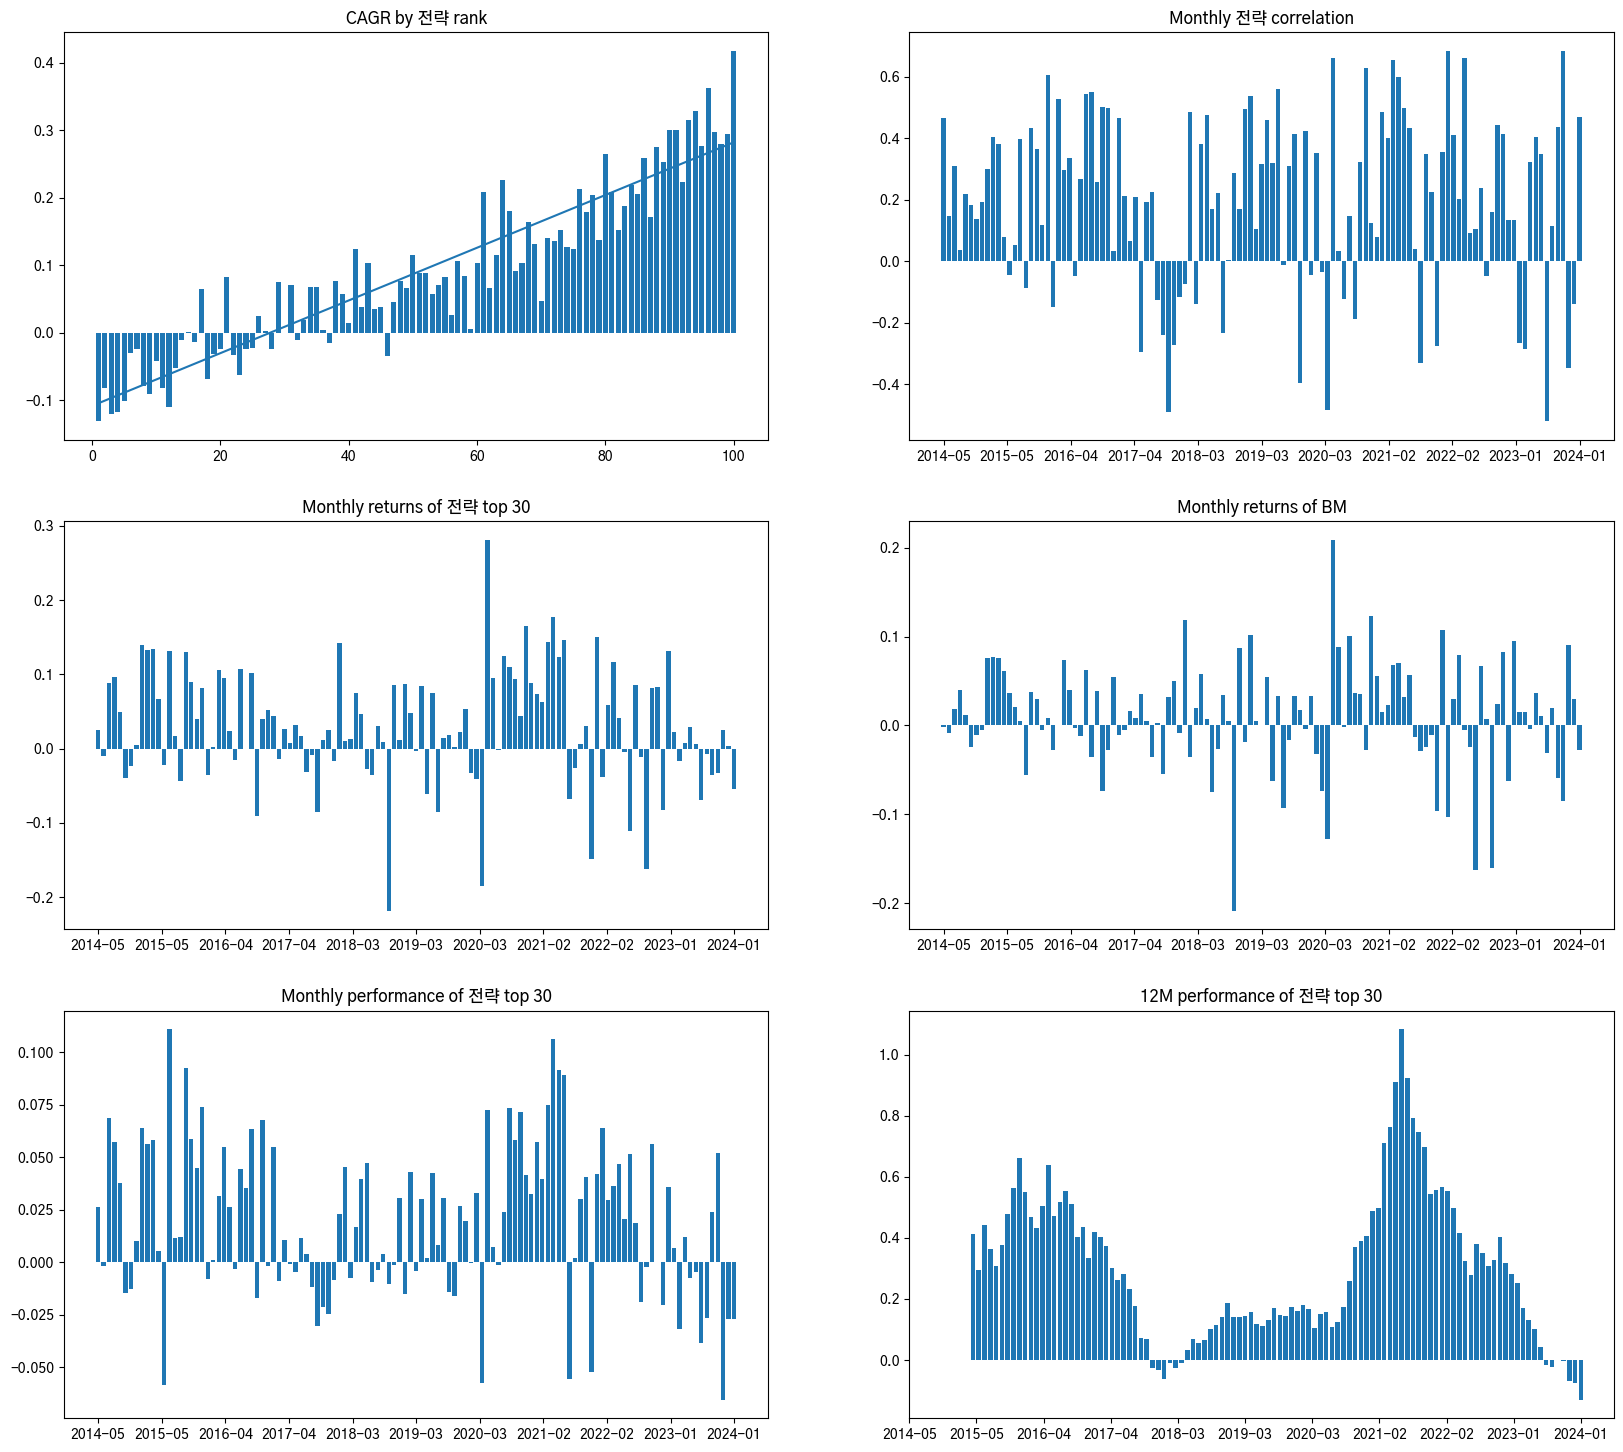

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 벤치마크 월별 수익률
returns_bm = hst.groupby("매도년월")["수익률"].mean()
top_cnt = 30


def cagr_corr_by_rank(factor: str, graph: bool = False):
    # 월별, 팩터 랭크별 수익률
    returns_by_pct = (
        hst
        .groupby(["매도년월", f"{factor}_pct"])["수익률"]
        .mean()
        .to_frame()
        .reset_index()
        .pivot(index="매도년월", columns=f"{factor}_pct")
        .droplevel(level=0, axis=1)
    )

    # 월별 팩터 상위 n 종목 수익률
    returns_top = (
        hst
        .groupby("매도년월")
        .apply(
            lambda x: x.nlargest(top_cnt, f"{factor}_pct")["수익률"].mean(),
            include_groups=False
        )
    )
    
    years = returns_by_pct.index.min().duration(returns_by_pct.index.max())
    cagr_by_pct = (returns_by_pct + 1).prod() ** (1 / years) - 1
    corr_by_month = returns_by_pct.apply(lambda x: x.corr(pd.Series(x.index)), axis=1)
    cum = (returns_by_pct + 1).cumprod()
    dd = cum / cum.cummax() - 1
    mdd = dd.min()
    model = LinearRegression()
    model.fit(cagr_by_pct.index.to_frame(), cagr_by_pct.values)
    coef = model.coef_[0]

    if graph:
        n_rows, n_cols = 3, 2
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
        fig.set_figwidth(20), fig.set_figheight(6 * n_rows)

        axis_of = lambda x: axes[int(x / 2)][x % 2]

        # pct 별 CAGR
        axis_of(0).set_title(f"CAGR by {factor} rank")
        axis_of(0).bar(cagr_by_pct.index, cagr_by_pct.values)
        axis_of(0).plot(cagr_by_pct.index, model.predict(cagr_by_pct.index.to_frame("test")))

        # 월별 팩터 상관성 
        axis_of(1).set_title(f"Monthly {factor} correlation")
        axis_of(1).bar([str(i) for i in corr_by_month.index], corr_by_month.values)
        axis_of(1).set_xticks(np.quantile(np.arange(0, len(corr_by_month)), [1 * i / 10 for i in range(10)] + [1]))

        # 팩터 상위 월별 수익률
        axis_of(2).set_title(f"Monthly returns of {factor} top {top_cnt}")
        axis_of(2).bar([str(i) for i in returns_top.index], returns_top.values)
        axis_of(2).set_xticks(np.quantile(np.arange(0, len(returns_top)), [1 * i / 10 for i in range(10)] + [1]))

        # BM 월별 수익률
        axis_of(3).set_title(f"Monthly returns of BM")
        axis_of(3).bar([str(i) for i in returns_bm.index], returns_bm.values)
        axis_of(3).set_xticks(np.quantile(np.arange(0, len(returns_bm)), [1 * i / 10 for i in range(10)] + [1]))

        # 팩터 상위 월별 성능
        axis_of(4).set_title(f"Monthly performance of {factor} top {top_cnt}")
        axis_of(4).bar([str(i) for i in returns_top.index], (returns_top - returns_bm).values)
        axis_of(4).set_xticks(np.quantile(np.arange(0, len(returns_top)), [1 * i / 10 for i in range(10)] + [1]))

        # 팩터 상위 월별 성능 1년 롤링
        y = (returns_top - returns_bm).rolling(12).apply(lambda x: (x + 1).prod() - 1)
        axis_of(5).set_title(f"12M performance of {factor} top {top_cnt}")
        axis_of(5).bar([str(i) for i in returns_top.index], y)
        axis_of(5).set_xticks(np.quantile(np.arange(0, len(returns_top)), [1 * i / 10 for i in range(10)] + [1]))

    # pd.DataFrame({
    #     "top":returns_top,
    #     "bm":returns_bm,
    #     "perf":returns_top - returns_bm
    # }).to_csv("test.csv")

    return pd.Series({
        "cagr_corr": cagr_by_pct.to_frame(factor).reset_index().corr("spearman").loc[f"{factor}_pct", factor],
        "cagr_coef": coef,
        "cagr_corr_std": corr_by_month.std(),
        "mdd_corr": mdd.to_frame("mdd").reset_index().corr("spearman").loc[f"{factor}_pct", "mdd"]
    })


cagr_corr_by_rank("전략", True)
# factors = [col.split("_pct")[0] for col in hst.columns if col.endswith("_pct")]
# factors = factors[:5]  # fixme
# df = pd.DataFrame(
#     pd.Series(factors).apply(cagr_corr_by_rank),
#     index=factors
# )
# df